In [1]:
# House Price Prediction Project

In [170]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [81]:
# Descargar el dataset desde OpenML
boston = fetch_openml(name="boston", version=1, as_frame=True) # abrimos el archivo 
df = boston.frame  # DataFrame con datos y target


In [83]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [85]:
#CRIM     per capita crime rate by town
#ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS    proportion of non-retail business acres per town
#CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX      nitric oxides concentration (parts per 10 million)
#RM       average number of rooms per dwelling
#AGE      proportion of owner-occupied units built prior to 1940
#DIS      weighted distances to five Boston employment centres
#RAD      index of accessibility to radial highways
#TAX      full-value property-tax rate per $10,000
#PTRATIO  pupil-teacher ratio by town
#B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#LSTAT    % lower status of the population
#MEDV     Median value of owner-occupied homes in $1000's

In [87]:
# la variable MEDV es nuestro traget --> precio 

In [89]:
df.rename(columns={'MEDV':'Price'},inplace=True)

In [91]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [93]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [95]:
df.info() # observamos que tenemos datos categóricos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Price    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [97]:
# debemos convertir estos datos categóricos a numéricos para entrenar el modelo

In [99]:
df['CHAS']=df['CHAS'].astype(float)

In [101]:
df['RAD']=df['RAD'].astype(float)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
# Entendemos la correlación entre los datos
#Correlación positiva y negativa

In [105]:
correlation=df.corr()

<Axes: >

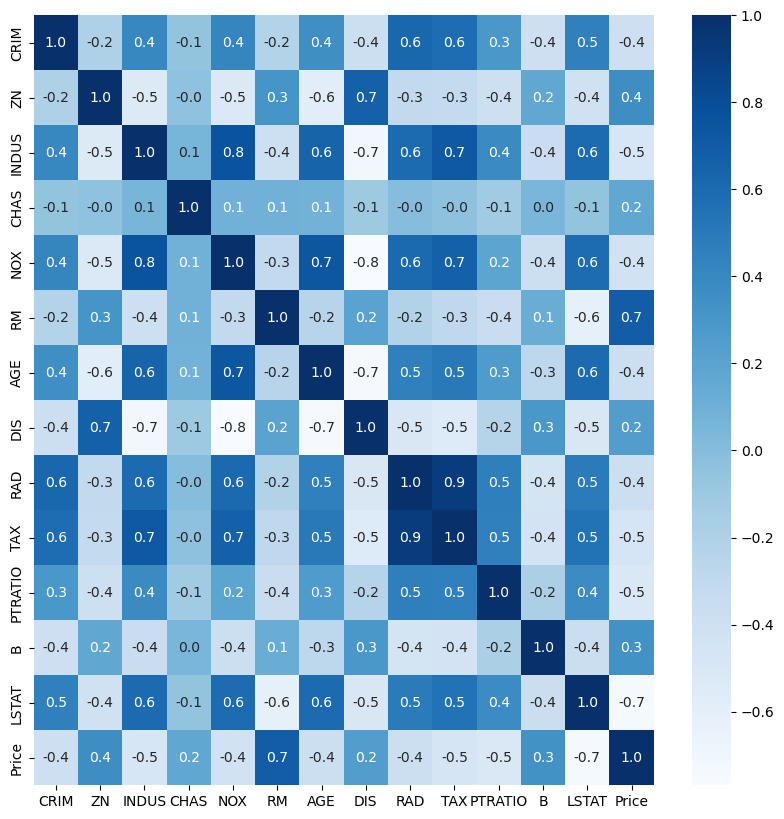

In [107]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='Blues',fmt='.1f')

In [109]:
# Realizamos la separación de los datos
X=df.drop(columns='Price')
y=df['Price']

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [113]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


In [55]:
# Entrenamiento del modelo XGBoost

In [115]:
model=XGBRegressor()

In [117]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Evaluamos el modelo

In [119]:
X_train_pred=model.predict(X_train)

In [162]:
X_test_pred=model.predict(X_test)

In [174]:
# R square error
score_1=metrics.r2_score(y_train,X_train_pred)

# Mean Absolute Error
score_2=metrics.mean_absolute_error(y_train,X_train_pred)

print(f'R square error: {score_1}\nMean Absolute Error: {score_2}')

R square error: 0.9999980039471451
Mean Absolute Error: 0.0091330346494618


In [164]:
# R square error
score_1=metrics.r2_score(y_test,X_test_pred)

# Mean Absolute Error
score_2=metrics.mean_absolute_error(y_test,X_test_pred)

print(f'R square error: {score_1}\nMean Absolute Error: {score_2}')

R square error: 0.9051721149855378
Mean Absolute Error: 2.0748727686264927


In [160]:
data=(0.02731, 0.00 ,  7.070,  0 , 0.4690 , 6.4210,  78.90 , 4.9671 ,  2 , 242.0,  17.80, 396.90  , 9.14 )

data_np=np.asarray(data)
data_np_reshaped=data_np.reshape(1,-1)

In [156]:
model.predict(data_np_reshaped)

array([22.86288], dtype=float32)

In [166]:
# Visualizamos los precios actuales y las predicciones

Text(0.5, 1.0, 'Precios actuales vs predicción')

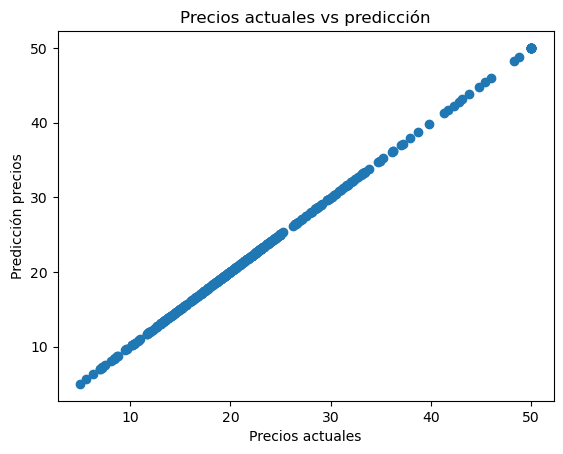

In [168]:
plt.scatter(y_train,X_train_pred)
plt.xlabel('Precios actuales')
plt.ylabel('Predicción precios')
plt.title('Precios actuales vs predicción')

Text(0.5, 1.0, 'Precios actuales vs predicción')

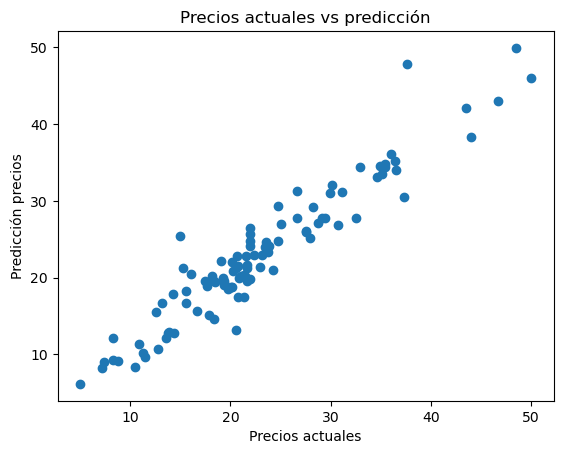

In [172]:
plt.scatter(y_test,X_test_pred)
plt.xlabel('Precios actuales')
plt.ylabel('Predicción precios')
plt.title('Precios actuales vs predicción')